In [23]:
%matplotlib widget
import os
import sys
from IPython import embed
from mpl_toolkits.axes_grid1 import AxesGrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
from matplotlib.table import Table
import pickle
import numpy as np
import yaml

## methods for evaluating training results
sys.path.append("../core")
from model import CAI_Model

## methods for evaluating resims
sys.path.append(os.path.abspath("/develop/code/cai_2023/evaluation"))
import eval_methods as em

path_results = "/develop/results"

plt.style.use('seaborn-v0_8')

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [2]:
# Get the encoder paths

all_folders = os.listdir(path_results)
model_folders = []
for f in all_folders:
    if 'encoderTraining' in f:
        model_folders.append(f)

model_folders.sort()
print(model_folders)

['model_encoderTraining_000', 'model_encoderTraining_001', 'model_encoderTraining_002', 'model_encoderTraining_003', 'model_encoderTraining_004', 'model_encoderTraining_005', 'model_encoderTraining_006', 'model_encoderTraining_007', 'model_encoderTraining_008', 'model_encoderTraining_009', 'model_encoderTraining_010', 'model_encoderTraining_011', 'model_encoderTraining_012', 'model_encoderTraining_013', 'model_encoderTraining_014', 'model_encoderTraining_015', 'model_encoderTraining_016', 'model_encoderTraining_017', 'model_encoderTraining_018', 'model_encoderTraining_019', 'model_encoderTraining_020', 'model_encoderTraining_021', 'model_encoderTraining_022', 'model_encoderTraining_023', 'model_encoderTraining_024', 'model_encoderTraining_025', 'model_encoderTraining_026', 'model_encoderTraining_027', 'model_encoderTraining_028', 'model_encoderTraining_029', 'model_encoderTraining_lr_000', 'model_encoderTraining_lr_001', 'model_encoderTraining_lr_002', 'model_encoderTraining_lr_003', '

In [4]:
#For each of the models, get the losses. Let's categorize now...

model_losses = {}

#Going to do this part manually for now...
model_losses['resnet18'] = {}
model_losses['resnet34'] = {}
model_losses['resnet50'] = {}


for mf in model_folders:
    path_loss = os.path.join(path_results, mf)
    single_loss = em.gather_loss(path_loss)
    params = yaml.load(open(os.path.join(path_results,mf,'params.yaml'),'r'), Loader=yaml.FullLoader)

    backbone = params['backbone']
    gamma = params['mcl_params']['gamma']
    model_losses[backbone][gamma] = single_loss


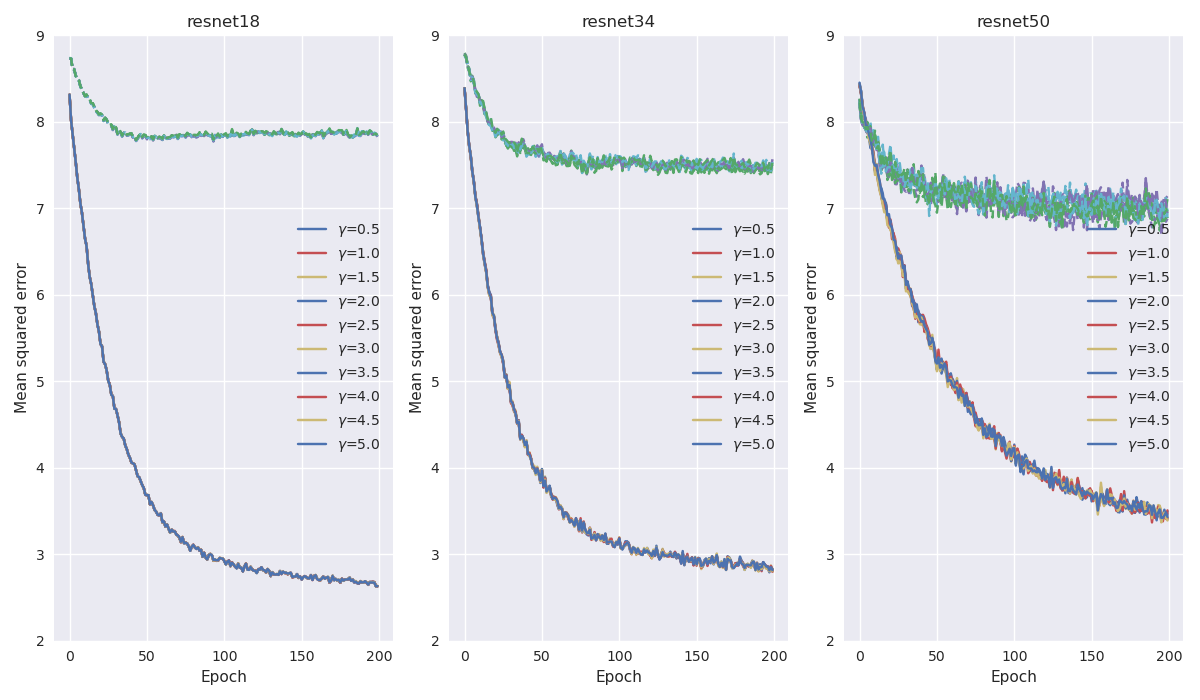

In [45]:
fig,ax = plt.subplots(1,3,figsize=(12,7))

for i,k in enumerate(model_losses):
    for j,g in enumerate(model_losses[k]):
        #print(model_losses[k][g]['loss'].keys())

        for z,name in enumerate(model_losses[k][g]['loss']):
            if(name == "epoch"):
                continue
            if('val' in name):
                val_x_vals = model_losses[k][g]['loss']["epoch"]
                val_x_vals = val_x_vals[val_x_vals.index % 2 == 0]
                val_y_vals = model_losses[k][g]['loss'][name]
                val_y_vals = val_y_vals[val_y_vals.index % 2 == 0]
        
            else:
                train_x_vals = model_losses[k][g]['loss']["epoch"]
                train_x_vals = train_x_vals[train_x_vals.index % 2 != 0]
                train_y_vals = model_losses[k][g]['loss'][name]
                train_y_vals = train_y_vals[train_y_vals.index % 2 != 0]
        
        ax[i].plot(train_x_vals, train_y_vals, label= r"$\gamma$={}".format(model_losses[k][g]['gamma']))
        ax[i].grid(True)

        ax[i].plot(val_x_vals, val_y_vals, linestyle='--')
        ax[i].grid(True)

        ax[i].set_title(k)
        ax[i].legend(loc='center right')

        ax[i].set_ylim(2,9)
        ax[i].set_ylabel("Mean squared error")
        ax[i].set_xlabel("Epoch")

        #ax[i].text(x=50,y=6, s="Training")

        # ax[i].text(125,5, "Training",
        #     ha="center", va="center", rotation=0, size=15,
        #     bbox=dict(boxstyle="larrow,pad=0.3",
        #               fc="lightblue", ec="steelblue", lw=2))

        # ax[i].text(125,8, "Validation",
        #     ha="center", va="center", rotation=0, size=15,
        #     bbox=dict(boxstyle="larrow,pad=0.3",
        #               fc="lightblue", ec="steelblue", lw=2))
plt.tight_layout()
fig.savefig("encoders.pdf")

In [28]:
plt.close('all')

In [3]:
# Get the encoder paths

all_folders = os.listdir(path_results)
model_folders = []
for f in all_folders:
    if 'encoderTraining_lr' in f:
        model_folders.append(f)

model_folders.sort()
print(model_folders)

['model_encoderTraining_lr_000', 'model_encoderTraining_lr_001', 'model_encoderTraining_lr_002', 'model_encoderTraining_lr_003', 'model_encoderTraining_lr_004', 'model_encoderTraining_lr_005', 'model_encoderTraining_lr_006', 'model_encoderTraining_lr_007', 'model_encoderTraining_lr_008', 'model_encoderTraining_lr_009', 'model_encoderTraining_lr_010', 'model_encoderTraining_lr_011', 'model_encoderTraining_lr_012', 'model_encoderTraining_lr_013', 'model_encoderTraining_lr_014', 'model_encoderTraining_lr_015', 'model_encoderTraining_lr_016', 'model_encoderTraining_lr_017', 'model_encoderTraining_lr_018', 'model_encoderTraining_lr_019', 'model_encoderTraining_lr_020', 'model_encoderTraining_lr_021', 'model_encoderTraining_lr_022', 'model_encoderTraining_lr_023', 'model_encoderTraining_lr_024', 'model_encoderTraining_lr_025', 'model_encoderTraining_lr_026', 'model_encoderTraining_lr_027', 'model_encoderTraining_lr_028', 'model_encoderTraining_lr_029']


In [10]:
path_results

'/develop/results'

In [5]:
#For each of the models, get the losses. Let's categorize now...

model_losses = {}

#Going to do this part manually for now...
model_losses['resnet18'] = {}
model_losses['resnet34'] = {}
model_losses['resnet50'] = {}


for mf in model_folders:
    path_loss = os.path.join(path_results, mf)
    single_loss = em.gather_loss(path_loss)
    params = yaml.load(open(os.path.join(path_results,mf,'params.yaml'),'r'), Loader=yaml.FullLoader)

    backbone = params['backbone']
    lr = params['learning_rate']
    model_losses[backbone][lr] = single_loss


3.52231773018837
7458309148.16
148797774356.48
1071713896693.76
4914282169630.72
16892011248353.28
47065266126848.0
113240116025098.23
244726200365219.84
486117911937679.4
3.695519827604294
1298240885.12
137975343308.8
952600168366.08
4224699929722.88
14203158590914.56
39068413554851.84
93211221934735.36
200422068783677.44
396514332214558.75
4.681395164728165
35173882224.64
765106659983.36
5724066883829.76
26511258440171.52
92932710711951.36
260804573092904.97
635418055802880.0
1388448511887933.5
2779694782249697.5


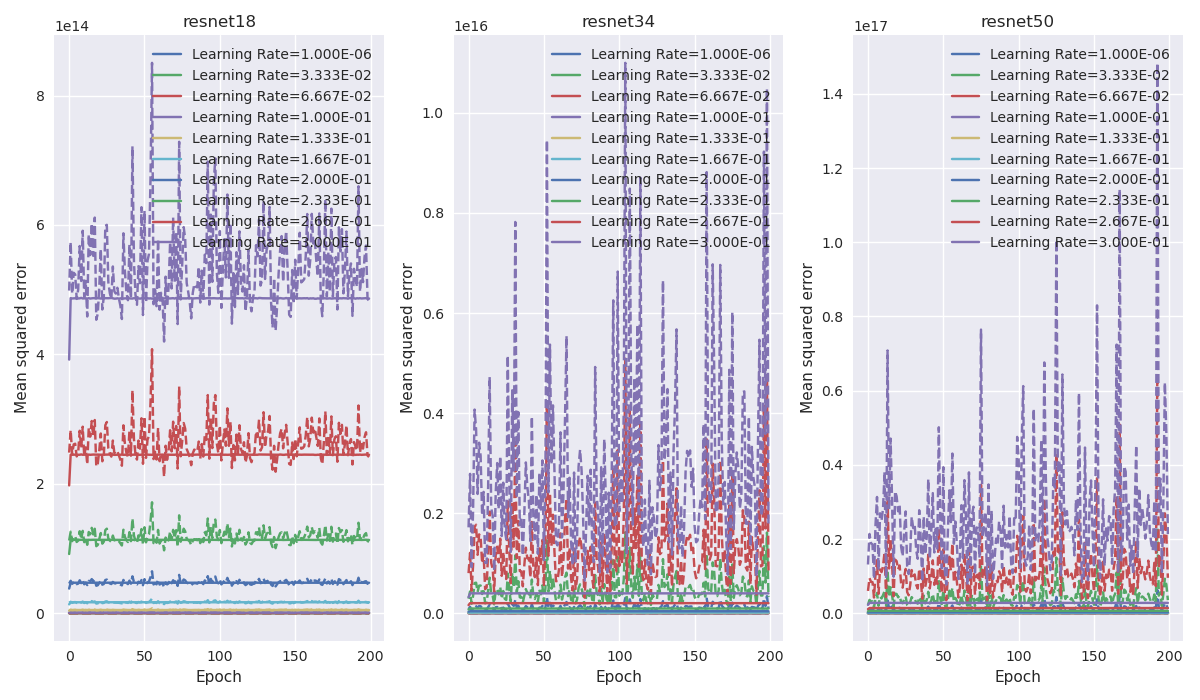

In [26]:
fig,ax = plt.subplots(1,3,figsize=(12,7))

for i,k in enumerate(model_losses):
    for j,g in enumerate(model_losses[k]):
        #print(model_losses[k][g]['loss'].keys())
        for z,name in enumerate(model_losses[k][g]['loss']):
            if(name == "epoch"):
                continue
            if('val' in name):
                val_x_vals = model_losses[k][g]['loss']["epoch"]
                val_x_vals = val_x_vals[val_x_vals.index % 2 == 0]
                val_y_vals = model_losses[k][g]['loss'][name]
                val_y_vals = val_y_vals[val_y_vals.index % 2 == 0]
        
            else:
                train_x_vals = model_losses[k][g]['loss']["epoch"]
                train_x_vals = train_x_vals[train_x_vals.index % 2 != 0]
                train_y_vals = model_losses[k][g]['loss'][name]
                train_y_vals = train_y_vals[train_y_vals.index % 2 != 0]
        
        line, = ax[i].plot(train_x_vals, train_y_vals, label= r"Learning Rate={:.3E}".format(g))
        ax[i].grid(True)
        #print(np.mean(train_y_vals))
        ax[i].plot(val_x_vals, val_y_vals, linestyle='--', color=line.get_color())
        ax[i].grid(True)

        ax[i].set_title(k)
        ax[i].legend(loc='upper right')
        #ax[i].set_ylim(7458309148-(0.1*7458309148),7458309148+(0.1*7458309148))
        ax[i].set_ylabel("Mean squared error")
        ax[i].set_xlabel("Epoch")

        #ax[i].text(x=50,y=6, s="Training")

        # ax[i].text(125,5, "Training",
        #     ha="center", va="center", rotation=0, size=15,
        #     bbox=dict(boxstyle="larrow,pad=0.3",
        #               fc="lightblue", ec="steelblue", lw=2))

        # ax[i].text(125,8, "Validation",
        #     ha="center", va="center", rotation=0, size=15,
        #     bbox=dict(boxstyle="larrow,pad=0.3",
        #               fc="lightblue", ec="steelblue", lw=2))
plt.tight_layout()
fig.savefig("encoders_lr_large.pdf")

3.52231773018837
7458309148.16
148797774356.48
1071713896693.76
4914282169630.72
16892011248353.28
47065266126848.0
113240116025098.23
244726200365219.84
486117911937679.4
3.695519827604294
1298240885.12
137975343308.8
952600168366.08
4224699929722.88
14203158590914.56
39068413554851.84
93211221934735.36
200422068783677.44
396514332214558.75
4.681395164728165
35173882224.64
765106659983.36
5724066883829.76
26511258440171.52
92932710711951.36
260804573092904.97
635418055802880.0
1388448511887933.5
2779694782249697.5


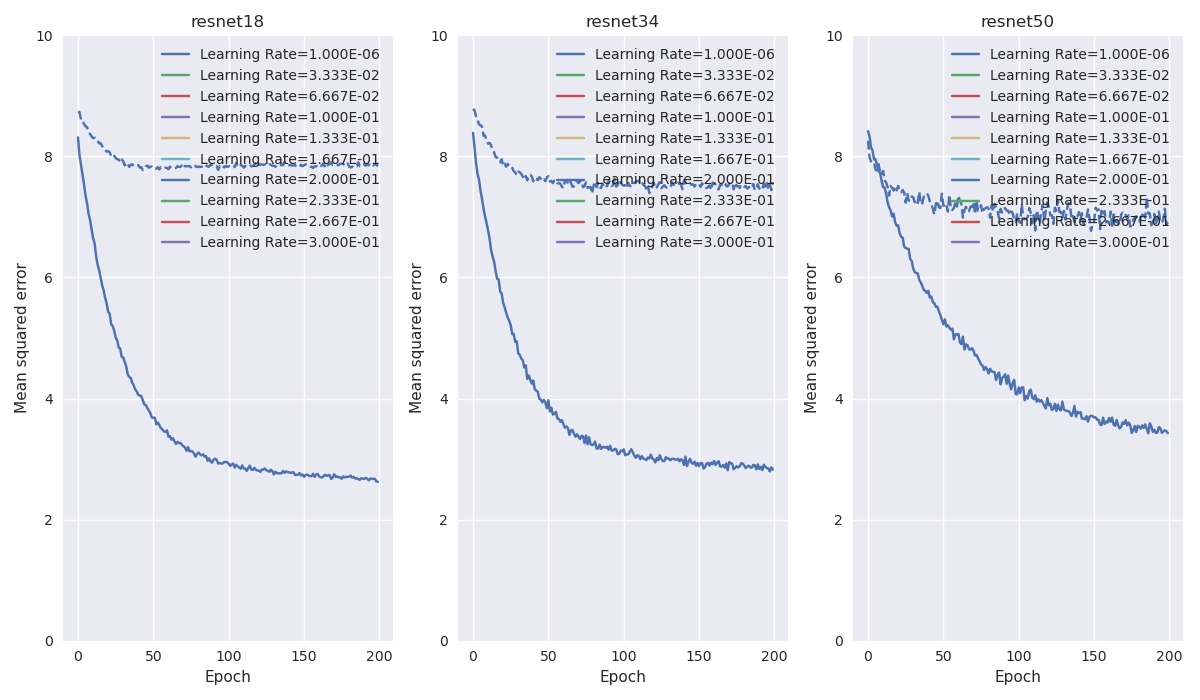

In [28]:
fig,ax = plt.subplots(1,3,figsize=(12,7))

for i,k in enumerate(model_losses):
    for j,g in enumerate(model_losses[k]):
        #print(model_losses[k][g]['loss'].keys())
        for z,name in enumerate(model_losses[k][g]['loss']):
            if(name == "epoch"):
                continue
            if('val' in name):
                val_x_vals = model_losses[k][g]['loss']["epoch"]
                val_x_vals = val_x_vals[val_x_vals.index % 2 == 0]
                val_y_vals = model_losses[k][g]['loss'][name]
                val_y_vals = val_y_vals[val_y_vals.index % 2 == 0]
        
            else:
                train_x_vals = model_losses[k][g]['loss']["epoch"]
                train_x_vals = train_x_vals[train_x_vals.index % 2 != 0]
                train_y_vals = model_losses[k][g]['loss'][name]
                train_y_vals = train_y_vals[train_y_vals.index % 2 != 0]
        
        line, = ax[i].plot(train_x_vals, train_y_vals, label= r"Learning Rate={:.3E}".format(g))
        ax[i].grid(True)
        print(np.mean(train_y_vals))
        ax[i].plot(val_x_vals, val_y_vals, linestyle='--', color=line.get_color())
        ax[i].grid(True)

        ax[i].set_title(k)
        ax[i].legend(loc='upper right')
        ax[i].set_ylim(0,10)
        ax[i].set_ylabel("Mean squared error")
        ax[i].set_xlabel("Epoch")

        #ax[i].text(x=50,y=6, s="Training")

        # ax[i].text(125,5, "Training",
        #     ha="center", va="center", rotation=0, size=15,
        #     bbox=dict(boxstyle="larrow,pad=0.3",
        #               fc="lightblue", ec="steelblue", lw=2))

        # ax[i].text(125,8, "Validation",
        #     ha="center", va="center", rotation=0, size=15,
        #     bbox=dict(boxstyle="larrow,pad=0.3",
        #               fc="lightblue", ec="steelblue", lw=2))
plt.tight_layout()
fig.savefig("encoders_lr_large_zoomed.pdf")